# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). The northern hemisphere has a significantly higher number of low temps in the higher latitudes than the southern hemisphere. This may be due to the fact that the weather data is being pulled from cities, and there is a much greater amount of land mass, and therefore cities, in the northern latitudes than the southern, which would result in more data from that region.
* Although there is no strong relationship between latitude and humidity, it is interesting to note that there are locations at all levels of latitude with 100% humidity, which is often associated with the tropics.
* There is a slight relationship between latitude and wind speed, as there is in an increase in higher windspeeds as one moves away from the equator. 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import urllib

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
units = "imperial"
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
# Set up empty lists to store temp(F), humidity, cloudiness, wind speed, country, date, and max temp
temp_f = []
humid = []
cloudy = []
wind = []
country = []
date = []
max_temp = []
city_num = 0
latitude = []
longitude = []
# Create base url and variables 
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build the query URL
query_url = f'{url}appid={api_key}&units={units}&q='
response = requests.get(query_url+city).json()

# print(json.dumps(response,indent=4,sort_keys=True))

# For loop through all cities to pull data on each and append to the empty lists
for city in cities:
    # Nest process in try/except so if a city isn't found in open weather then it won't fail
    try:
    # Make a request of the API using base URL + city for each weather variable, in json format
        response = requests.get(query_url+city).json()
        # Print "Processing record X for XXXX
        city_num = city_num + 1
        print("processing record "+str(city_num)+" for "+city)
        # For found cities, append the data to the appropriate list
        temp_f.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloudy.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        max_temp.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
    # For cities not found (returning an error), append "" to each list
    except urllib.error.HTTPError:
        temp_f.append("")
        humid.append("")
        cloudy.append("")
        wind.append("")
        country.append("")
        date.append("")
        max_temp.append("")
        latitude.append("")
        longitude.append("")

    except KeyError:
        temp_f.append("")
        humid.append("")
        cloudy.append("")
        wind.append("")
        country.append("")
        date.append("")
        max_temp.append("")
        latitude.append("")
        longitude.append("")


processing record 1 for rikitea
processing record 2 for port moresby
processing record 3 for kushiro
processing record 4 for forbes
processing record 5 for khatanga
processing record 6 for avarua
processing record 7 for kapaa
processing record 8 for gigmoto
processing record 9 for barentsburg
processing record 10 for vaini
processing record 11 for nanortalik
processing record 12 for busselton
processing record 13 for barrow
processing record 14 for kavaratti
processing record 15 for nome
processing record 16 for yangambi
processing record 17 for wukari
processing record 18 for haapu
processing record 19 for hermanus
processing record 20 for grand centre
processing record 21 for nikolskoye
processing record 22 for talnakh
processing record 23 for stornoway
processing record 24 for bluff
processing record 25 for guarapari
processing record 26 for ribeira grande
processing record 27 for faanui
processing record 28 for east london
processing record 29 for dunedin
processing record 30 for s

processing record 235 for usinsk
processing record 236 for tasiilaq
processing record 237 for yagodnoye
processing record 238 for touros
processing record 239 for pevek
processing record 240 for terrace
processing record 241 for bethel
processing record 242 for vestmannaeyjar
processing record 243 for salmon arm
processing record 244 for ketchikan
processing record 245 for norman wells
processing record 246 for kirakira
processing record 247 for ginir
processing record 248 for hachinohe
processing record 249 for sobolevo
processing record 250 for natchez
processing record 251 for agirish
processing record 252 for gao
processing record 253 for altamira
processing record 254 for alofi
processing record 255 for teguldet
processing record 256 for kazalinsk
processing record 257 for vao
processing record 258 for cidreira
processing record 259 for longyearbyen
processing record 260 for bathsheba
processing record 261 for los llanos de aridane
processing record 262 for bonavista
processing re

processing record 468 for alyangula
processing record 469 for vagur
processing record 470 for praia
processing record 471 for warri
processing record 472 for verkhnevilyuysk
processing record 473 for lima
processing record 474 for saint-georges
processing record 475 for dryden
processing record 476 for lubao
processing record 477 for port macquarie
processing record 478 for korsakov
processing record 479 for kieta
processing record 480 for mangrol
processing record 481 for lorengau
processing record 482 for clinton
processing record 483 for lithgow
processing record 484 for bubaque
processing record 485 for kikinda
processing record 486 for komsomolets
processing record 487 for phenix city
processing record 488 for tamandare
processing record 489 for puerto ayora
processing record 490 for pozo colorado
processing record 491 for brejo
processing record 492 for ilo
processing record 493 for umm lajj
processing record 494 for bayshore gardens
processing record 495 for bayaguana
processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
# Create a dictionary with city names and weather data, adding back in latitude and longitude created at start of code
weather_dict = {
    "City": cities,
    "Temperature":temp_f,
    "Humidity":humid,
    "Cloudiness":cloudy,
    "Wind Speed":wind,
    "Country":country,
    "Date":date,
    "Max Temp":max_temp,
    "Latitude":latitude,
    "Longitude":longitude
}
# Convert the dictionary into a pandas dataframe
weather_df = pd.DataFrame(weather_dict)
weather_df["Max Temp"] = pd.to_numeric(weather_df["Max Temp"])
weather_df["Latitude"] = pd.to_numeric(weather_df["Latitude"])
weather_df["Longitude"] = pd.to_numeric(weather_df["Longitude"])
weather_df["Wind Speed"] = pd.to_numeric(weather_df["Wind Speed"])
weather_df["Humidity"] = pd.to_numeric(weather_df["Humidity"])
weather_df["Cloudiness"] = pd.to_numeric(weather_df["Cloudiness"])
weather_df.head()
# Export the dataframe into the cities csv 
weather_df = weather_df.dropna(how='any')
weather_df.to_csv("Worldwide_Weather_Pattern_Data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

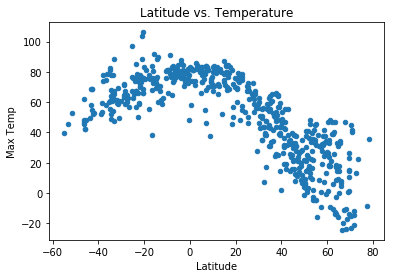

In [51]:

weather_df.plot(kind="scatter",x="Latitude",y="Max Temp")
plt.title("Latitude vs. Temperature")
plt.savefig("Lat_vs_Temp.png")

#### Latitude vs. Humidity Plot

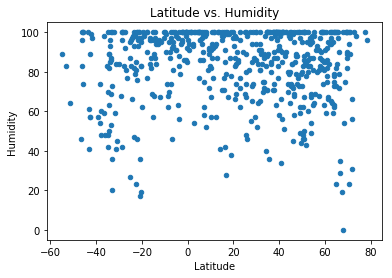

In [52]:
weather_df.plot(kind="scatter",x="Latitude",y="Humidity")
plt.title("Latitude vs. Humidity")
plt.savefig("Lat_vs_Humid.png")

#### Latitude vs. Cloudiness Plot

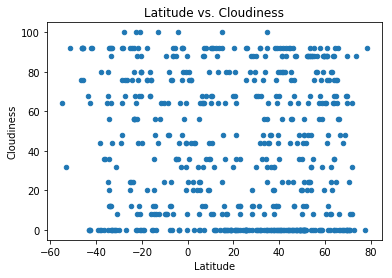

In [53]:
weather_df.plot(kind="scatter",x="Latitude",y="Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.savefig("Lat_vs_Cloud.png")

#### Latitude vs. Wind Speed Plot

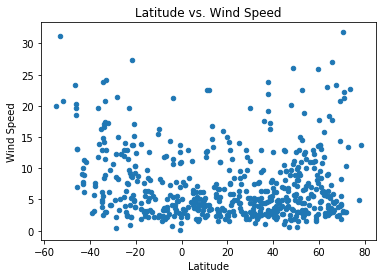

In [54]:
weather_df.plot(kind="scatter",x="Latitude",y="Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.savefig("Lat_vs_Wind.png")